In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
eth_prices = pd.read_csv('ETH-USD.csv')
eth_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,0.9488,0.9488,0.9184,0.9200,0.9200,43
1,2016-01-02,0.9200,0.9547,0.9200,0.9547,0.9547,68
2,2016-01-03,0.9547,0.9700,0.9506,0.9600,0.9600,485
3,2016-01-04,0.9600,0.9644,0.9186,0.9500,0.9500,787
4,2016-01-05,0.9500,0.9599,0.9409,0.9426,0.9426,735


In [3]:
eth_prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
828,2018-04-07,384.980011,404.220001,384.980011,400.720001,400.720001,107956653
829,2018-04-08,400.720001,431.230011,387.980011,399.019989,399.019989,271803047
830,2018-04-09,399.019989,418.269989,391.839996,415.649994,415.649994,129335600
831,2018-04-10,415.649994,433.440002,410.970001,430.420013,430.420013,167561896
832,2018-04-12,430.390015,476.149994,414.029999,468.290009,468.290009,271306176


In [4]:
ethereum = pd.read_csv('googletrends-ethereum.csv')

ethereum.head()

,Week,ethereum
0,03/01/16,1
1,10/01/16,1
2,17/01/16,1
3,24/01/16,2
4,31/01/16,1


In [5]:
ethereum.tail()

,Week,ethereum
114,11/03/18,21
115,18/03/18,20
116,25/03/18,21
117,01/04/18,17
118,08/04/18,15


In [6]:
weekly_price = []

for week in ethereum['Week']:
    w = eth_prices.loc[eth_prices['Date'] == week]
    price = w['High'].values
    if len(price) == 0:
        weekly_price.append(np.nan)
    else:
        weekly_price.append(price[0])

In [7]:
ethereum['Price'] = weekly_price

In [8]:
ethereum

,Week,ethereum,Price
0,03/01/16,1,NaN
1,10/01/16,1,NaN
2,17/01/16,1,NaN
3,24/01/16,2,NaN
4,31/01/16,1,NaN
5,07/02/16,3,NaN
6,14/02/16,2,NaN
7,21/02/16,2,NaN
8,28/02/16,4,NaN
9,06/03/16,4,NaN


In [11]:
# Drop weeks for which there are missing values 
ethereum = ethereum.dropna(axis=0, how='any')

In [13]:
data = ethereum[['ethereum','Price']].values

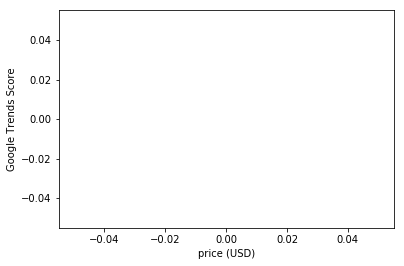

In [14]:
plt.plot(data[:,1],data[:,0], "bo")
plt.xlabel('price (USD)')
plt.ylabel('Google Trends Score')
plt.show()